In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import Performance as per

from sklearn.metrics import confusion_matrix 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
data_dir = pathlib.Path(r"../Data/byClass") 	#directory containing the pose vectors

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
batch_size = 32
img_height = 180
img_width = 180


282


In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 282 files belonging to 7 classes.
Using 170 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 282 files belonging to 7 classes.
Using 112 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['cat', 'fighting', 'front', 'hicho', 'horse', 'ready', 'seiza']


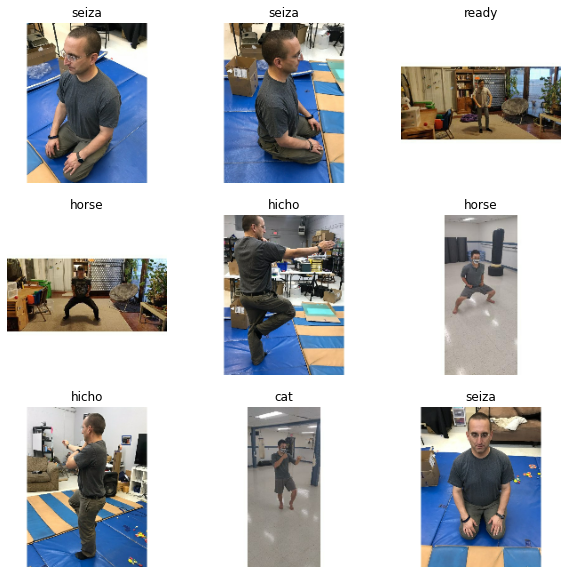

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

for image_batch, labels_batch in train_ds:
  x_train = image_batch.numpy()
  y_train = labels_batch.numpy()
  break
for image_batch, labels_batch in val_ds:
  x_test = image_batch.numpy()
  y_test = labels_batch.numpy()
  break


In [14]:
num_classes = 7
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRodata_augmentationtation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

AttributeError: module 'tensorflow.keras.layers.experimental.preprocessing' has no attribute 'RandomRodata_augmentationtation'

In [97]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_14 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 45, 45, 64)      

In [98]:
epochs=70
history = model.fit(x_train, y_train,epochs=epochs, batch_size=2)

Epoch 1/70
16/16 [==============================] - 1s 27ms/step - loss: 2.7894 - accuracy: 0.2359
Epoch 2/70
16/16 [==============================] - 0s 28ms/step - loss: 1.9211 - accuracy: 0.1860
Epoch 3/70
16/16 [==============================] - 0s 27ms/step - loss: 1.8867 - accuracy: 0.2950
Epoch 4/70
16/16 [==============================] - 0s 28ms/step - loss: 1.6730 - accuracy: 0.3395
Epoch 5/70
16/16 [==============================] - 0s 27ms/step - loss: 1.4062 - accuracy: 0.4143
Epoch 6/70
16/16 [==============================] - 0s 27ms/step - loss: 1.2826 - accuracy: 0.4865
Epoch 7/70
16/16 [==============================] - 0s 28ms/step - loss: 1.1109 - accuracy: 0.4997
Epoch 8/70
16/16 [==============================] - 0s 28ms/step - loss: 1.4512 - accuracy: 0.2067
Epoch 9/70
16/16 [==============================] - 0s 29ms/step - loss: 1.4233 - accuracy: 0.4585
Epoch 10/70
16/16 [==============================] - 0s 27ms/step - loss: 1.2048 - accuracy: 0.6208
Epoch 11/

In [99]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')

# plt.title('Training and Validation Loss')
# plt.show()

In [102]:
model.evaluate(x_test,  y_test, batch_size=2, verbose=2)
y_pred =  np.argmax(model.predict(x_test, batch_size=2),axis=-1)
print(tf.math.confusion_matrix(y_test,ypred))
print("0: fighting\n 1: front\n 2: ready\n 3: cat\n 4: horse \n 5: hicho \n 6: seiza")

ACC, TPR, TNR, PPV, NPV, FPR = per.GetPerformanceMetrics(y_test, y_pred, weighted=True)


print("Accuracy: ",ACC)
print("Recall: ",TPR)
print("Specificity: ",TNR)
print("Precision: ",PPV)
print("Negative Predictive Value: ",NPV)
print("FP rate(fall-out): ",FPR)


16/16 - 0s - loss: 2.8619 - accuracy: 0.5000
tf.Tensor(
[[0 1 3 0 0 0 0]
 [1 2 1 0 1 0 0]
 [1 1 5 0 2 0 0]
 [0 0 0 1 0 0 0]
 [1 2 1 0 3 0 0]
 [0 0 1 0 0 1 0]
 [0 0 0 0 0 0 4]], shape=(7, 7), dtype=int32)
0: fighting
 1: front
 2: ready
 3: cat
 4: horse 
 5: hicho 
 6: seiza
Accuracy:  0.7890625
Recall:  0.5182043650793651
Specificity:  0.8500036663216011
Precision:  0.5
Negative Predictive Value:  0.8701039412941527
FP rate(fall-out):  0.14999633367839887


In [104]:
(y_pred == y_test).mean()

0.5